In [1]:
# Importing the required libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

import time

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]
# len(colnames)

In [3]:
# Importing the KDCup99 dataset
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen
import io

f = urlopen('https://raw.githubusercontent.com/AkshatGarg7/DDOS-Detection-using-Machine-Learning/master/Dataset/dataset.zip').read()
zip_file = ZipFile(io.BytesIO(f))

train_df = pd.read_csv(zip_file.open('kddcup.csv'),header = None,names = colnames)
# print("train_df shape -> ",train_df.shape)
test_df = pd.read_csv(zip_file.open('corrected.csv'),header = None,names = colnames)
# print("test_df shape -> ",test_df.shape)

In [4]:
frames = [train_df,test_df]
df = pd.concat(frames)
print("df shape -> ",df.shape)

df shape ->  (805050, 42)


In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [6]:
#Finding the categorical values in the dataset
num_cols = df._get_numeric_data().columns
  
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('result')

cate_cols
 

['protocol_type', 'flag', 'service']

In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [8]:
##Train Test Split to overcome overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['result'],axis=1),df['result'],test_size=0.3,random_state=1)

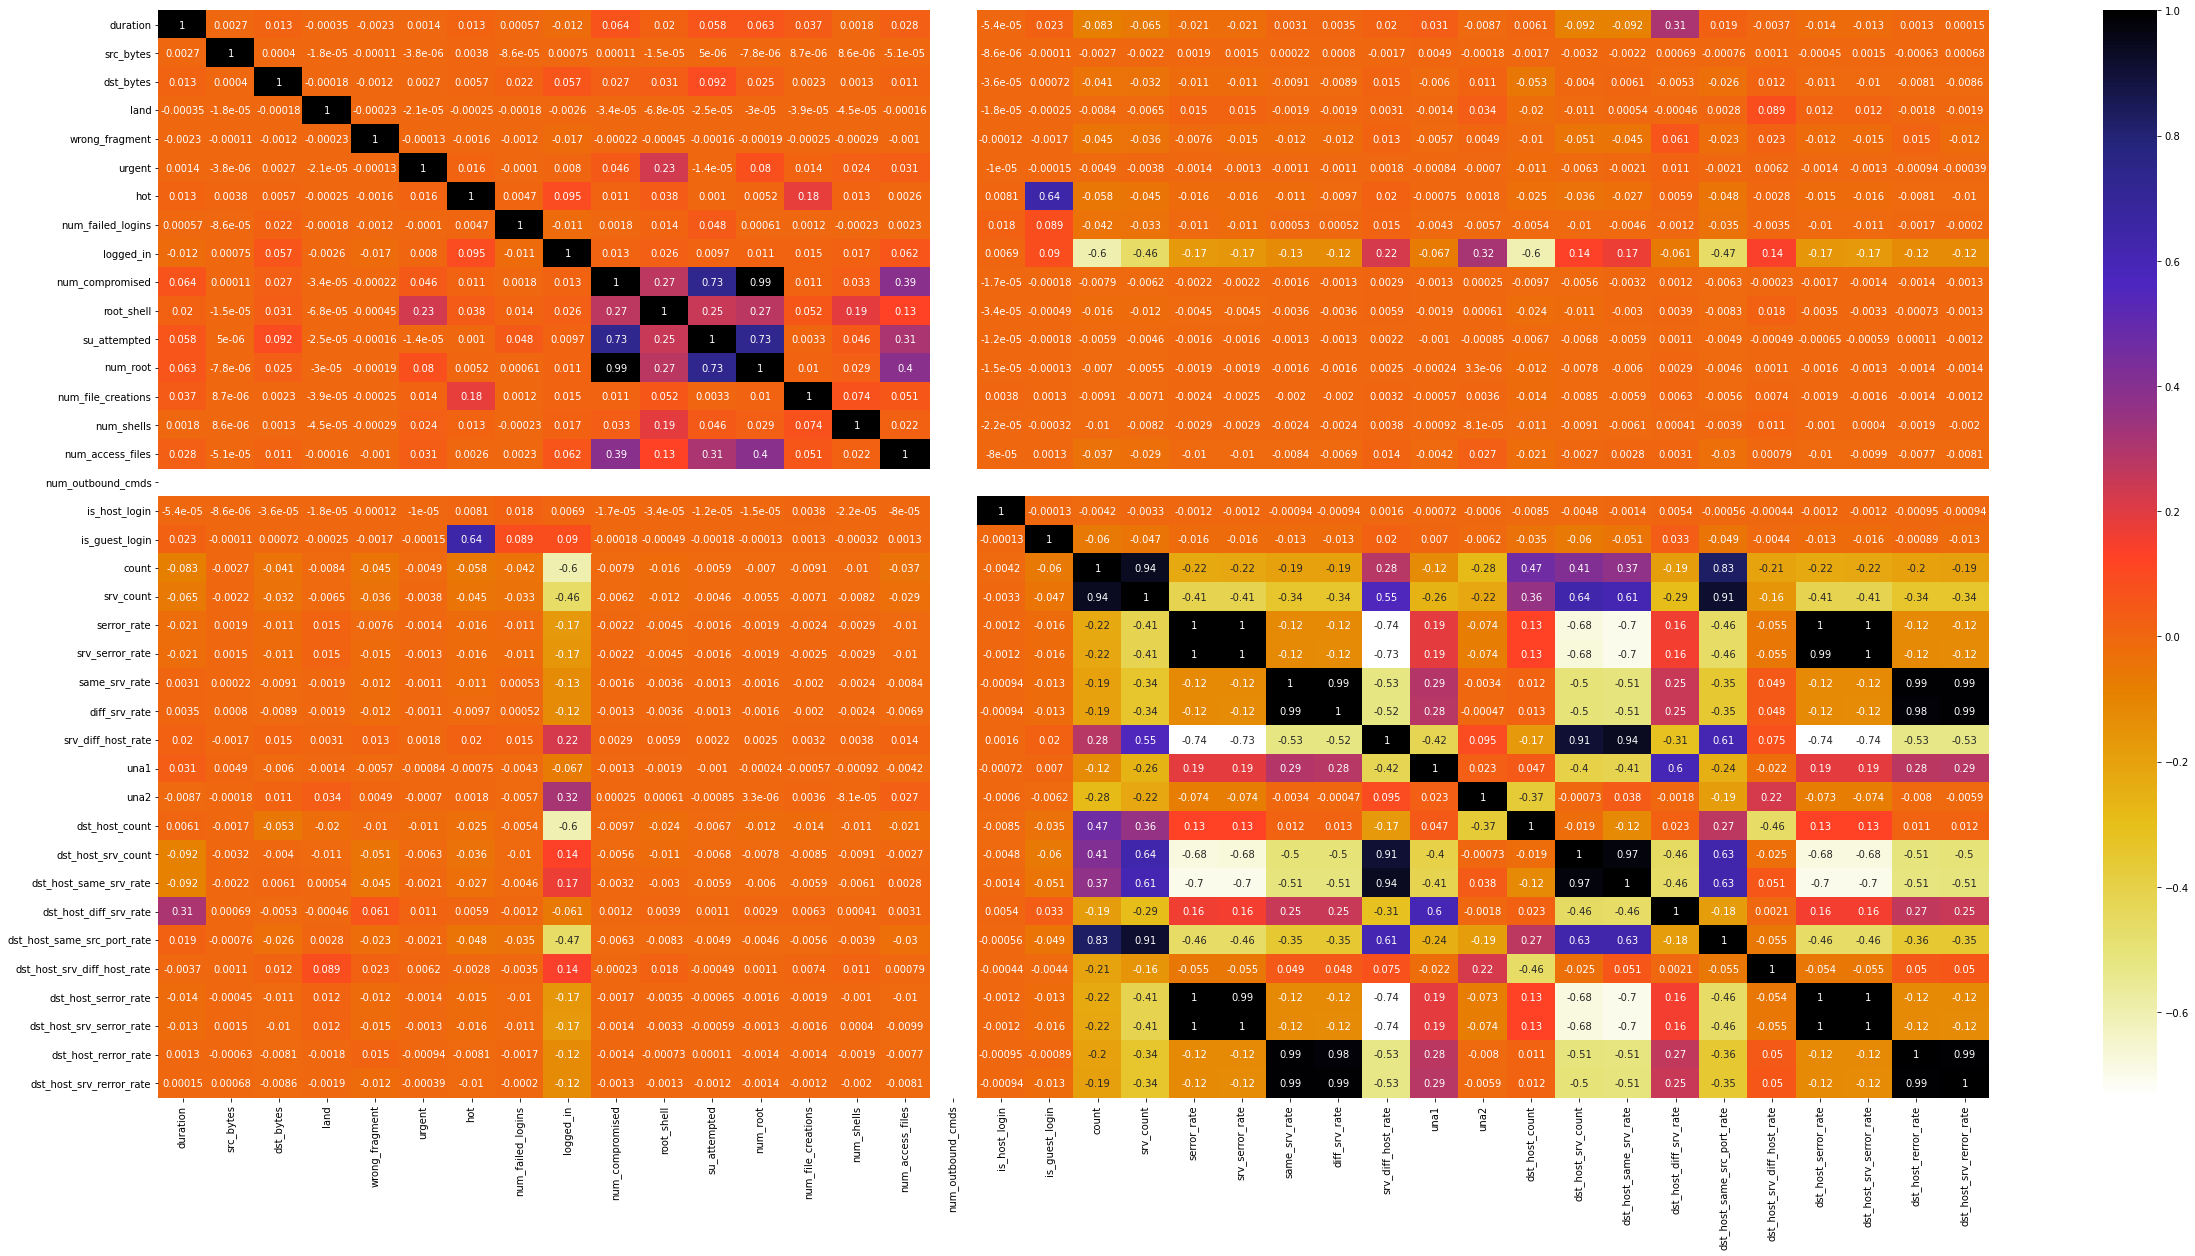

In [9]:
# df = df.dropna('columns')# drop columns with NaN
  
# # df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
  
# corr = df.corr()
  
# plt.figure(figsize =(15, 12))
  
# sns.heatmap(corr)
  
# plt.show()

import seaborn as sns
plt.figure(figsize=(41,20))
cor = X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()
 

In [10]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr 


In [11]:
corr_features = correlation(X_train, 0.95)
len(set(corr_features))

8

In [12]:
corr_features

{'diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'num_root',
 'srv_serror_rate'}

In [13]:

df.drop('diff_srv_rate', axis = 1, inplace = True)
  
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
  
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
  
df.drop('srv_serror_rate', axis = 1, inplace = True)
  
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

df.drop('num_root', axis = 1, inplace = True)
 

In [14]:
df.shape

(805050, 34)

In [15]:
df_copy=df.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df_copy['protocol_type'] = number.fit_transform(df_copy['protocol_type'])
df_copy['service'] = number.fit_transform(df_copy['service'])
df_copy['flag'] = number.fit_transform(df_copy['flag'])

In [17]:
##Train Test Split to overcome overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(labels=['result'],axis=1),df_copy['result'],test_size=0.3,random_state=1)

In [18]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([1.02821299e-01, 7.50756200e-01, 1.01438120e+00, 5.87872305e-01,
       1.11603674e+00, 5.26821114e-01, 7.72111820e-04, 1.29026679e-02,
       0.00000000e+00, 3.40978917e-02, 4.31458185e-03, 3.15980681e-01,
       2.49802124e-02, 1.10522585e-03, 5.08464560e-05, 1.68467582e-03,
       0.00000000e+00, 6.49593805e-04, 1.46508521e-04, 9.68772249e-04,
       6.52966442e-03, 9.55204535e-01, 8.20144219e-01, 2.76642340e-01,
       1.54764692e-01, 5.80774249e-01, 5.37411208e-01, 1.29514453e-01,
       2.59280008e-01, 7.38041531e-01, 6.78317156e-01, 8.07929459e-01,
       2.01109646e-01])

In [19]:
mutual_info = pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      1.116037
service                        1.014381
count                          0.955205
srv_count                      0.820144
dst_host_same_src_port_rate    0.807929
protocol_type                  0.750756
dst_host_srv_count             0.738042
dst_host_diff_srv_rate         0.678317
flag                           0.587872
srv_diff_host_rate             0.580774
una1                           0.537411
dst_bytes                      0.526821
logged_in                      0.315981
serror_rate                    0.276642
dst_host_count                 0.259280
dst_host_srv_diff_host_rate    0.201110
same_srv_rate                  0.154765
una2                           0.129514
duration                       0.102821
hot                            0.034098
num_compromised                0.024980
wrong_fragment                 0.012903
is_guest_login                 0.006530
num_failed_logins              0.004315
num_file_creations             0.001685


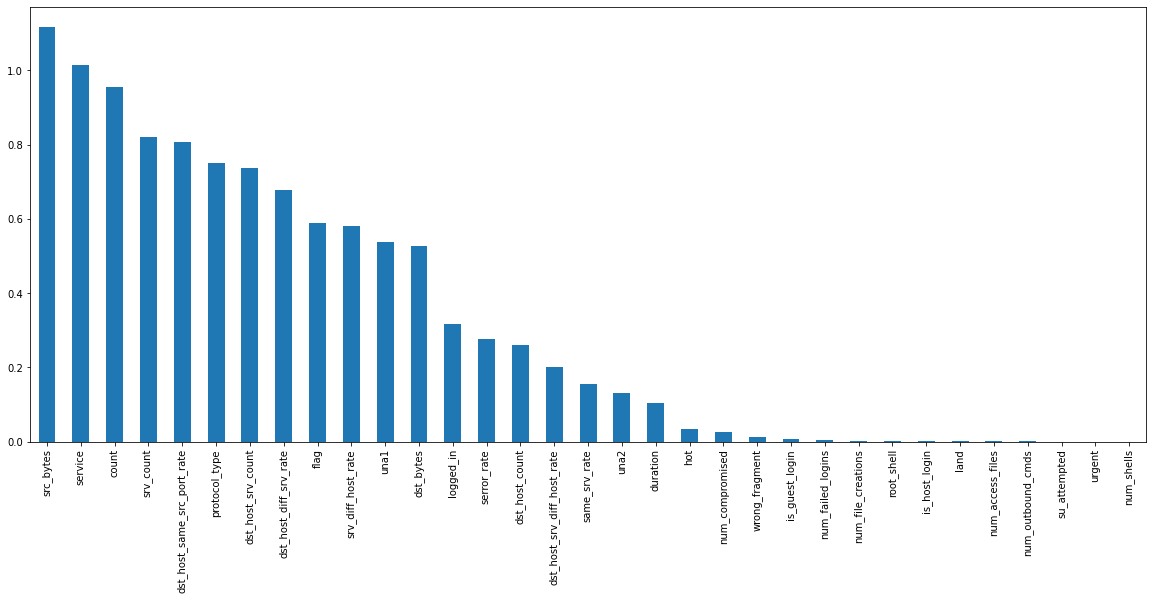

In [20]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [21]:
from sklearn.feature_selection import SelectKBest
sel_four_cols=SelectKBest(mutual_info_classif,k=5)
sel_four_cols.fit(X_train,y_train)
X_train.columns[sel_four_cols.get_support()]

Index(['service', 'src_bytes', 'count', 'srv_count',
       'dst_host_same_src_port_rate'],
      dtype='object')

In [22]:
features = ["service","src_bytes","dst_host_same_src_port_type","count"]
target = "result"

In [23]:
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]
pd.Series(icmp_df.result.value_counts(ascending=True))

portsweep.         1
multihop.          1
snmpguess.         3
satan.             4
saint.           102
nmap.            103
pod.             351
ipsweep.        1459
normal.         1666
smurf.        444881
Name: result, dtype: int64

In [24]:

from sklearn.model_selection import train_test_split
  
# Target variable and train set
y = df[['result']]
X = df.drop(['result', ], axis = 1)
  
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(539383, 33) (265667, 33)
(539383, 1) (265667, 1)


In [25]:
# # Gaussian Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
  
# clfg = GaussianNB()
# start_time = time.time()
# clfg.fit(X_train, y_train.values.ravel())
# end_time = time.time()
# print("Training time: ", end_time-start_time)
 

In [26]:
# start_time = time.time()
# y_test_pred = clfg.predict(X_train)
# end_time = time.time()
# print("Testing time: ", end_time-start_time)

In [27]:
# print("Train score is:", clfg.score(X_train, y_train))
# print("Test score is:", clfg.score(X_test, y_test))
 

In [28]:
# check version number
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek  
from sklearn.model_selection import train_test_split
from collections import Counter
def x_y(df_given):
  X = df_given.loc[:,features]
  y = df_given.loc[:,target]
  counter = Counter(y)
  print("before: ",counter)
  oversample = ADASYN(random_state = 1)
  X,y = oversample.fit_resample(X,y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
  counter = Counter(y)
  print("after: ",counter)
  return X_train, X_test, y_train, y_test

In [29]:
def ml_model(X_train, X_test, y_train, y_test):
  for model in models:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      score = accuracy_score(y_test, y_pred)*100
      scores.append(score)
      print("Accuracy of  model is: ", score)
      conf_matrix = confusion_matrix(y_test,y_pred)
      report = classification_report(y_test,y_pred)
      print("Confusion Matrix:\n",conf_matrix)
      print("Report:\n",report)
      print("\n==============***===============")

In [30]:
X_train, X_test, y_train, y_test = x_y(icmp_df)
ml_model(X_train, X_test, y_train, y_test)

KeyError: ignored